### Categorise data into different groups
We simulate the process by taking the data of different states in the United StatesWe only use number of population, total energy price in a state and whether it is a coast city or not. We could mimic the data for household energy price, family size, and housing types.

### Import the csv

import libraries needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv("Energy Census and Economic Data US 2010-2014.csv")
df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


### Extract usful columns

In [3]:
df = df[["CENSUS2010POP","Coast","TotalPrice2010"]]

# data cleaning
data = df.dropna().to_numpy()
print(df.head())
print(df.describe())
print(f"number of data points: {len(data)}")


   CENSUS2010POP  Coast  TotalPrice2010
0        4779736    1.0           17.82
1         710231    1.0           20.13
2        2915918    0.0           22.25
3        6392017    0.0           16.90
4       37253956    1.0           20.97
       CENSUS2010POP      Coast  TotalPrice2010
count   5.200000e+01  51.000000       52.000000
mean    1.187483e+07   0.450980       19.416923
std     4.251612e+07   0.502543        3.212383
min     5.636260e+05   0.000000       13.790000
25%     1.761651e+06   0.000000       17.247500
50%     4.436370e+06   0.000000       18.500000
75%     7.043661e+06   1.000000       21.235000
max     3.087455e+08   1.000000       30.430000
number of data points: 51


### Normalize data and divide it into 4 clusters

In [4]:
data_normalized = preprocessing.normalize(data)
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized)

In [5]:
# Show the data cluster and centre points
print(kmeans.cluster_centers_)

[[1.00000000e+00 1.24509582e-07 8.56707114e-06]
 [9.99999999e-01 0.00000000e+00 4.03826983e-05]
 [1.00000000e+00 5.51828560e-07 2.27463719e-05]
 [1.00000000e+00 6.89617128e-08 2.74919429e-06]]


### Show the clusters with pairplot
find relationship between attributes

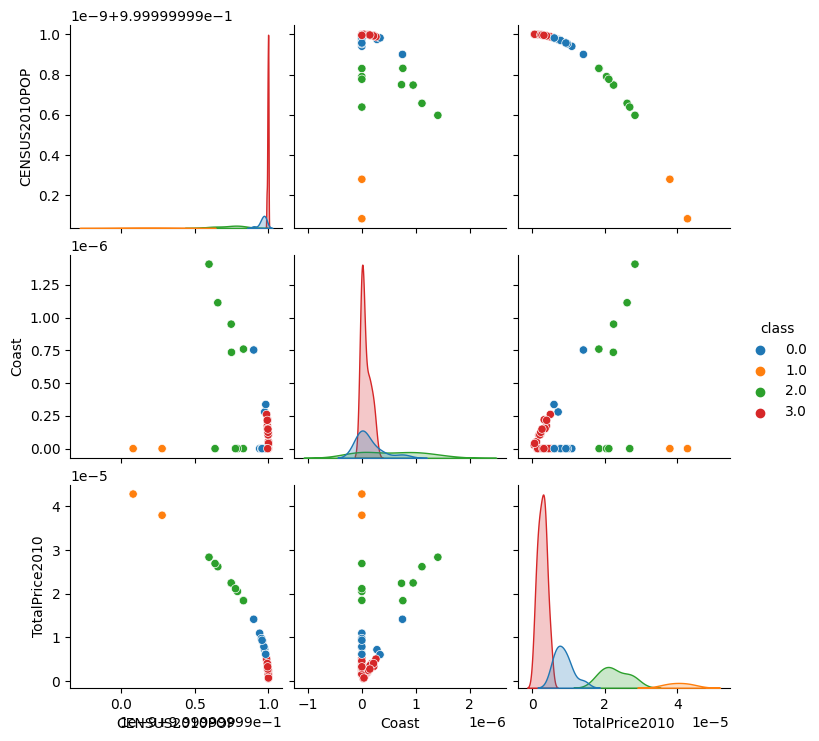

In [6]:
y_kmeans = kmeans.predict(data_normalized)
centers = kmeans.cluster_centers_

# append the class of prediction to each data point
data_normalized = np.hstack((data_normalized,np.reshape(y_kmeans, (-1,1))))

# pairplot
sns.pairplot(pd.DataFrame(data=data_normalized, columns=["CENSUS2010POP","Coast","TotalPrice2010","class"]),hue="class", palette="tab10")

### Show the centre point using census and totalprice

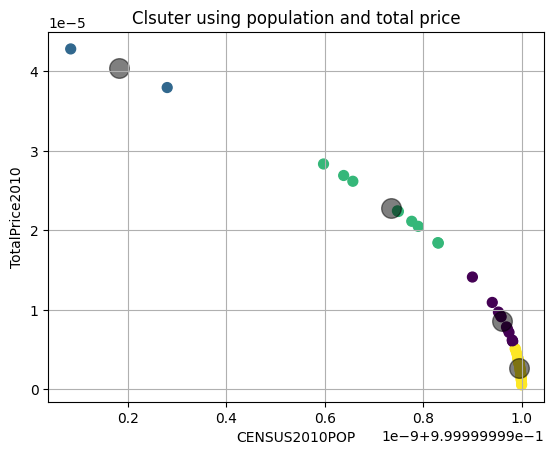

In [7]:
plt.scatter(data_normalized[:, 0], data_normalized[:, 2], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5)
plt.xlabel("CENSUS2010POP")
plt.ylabel("TotalPrice2010")
plt.grid()
plt.title("Clsuter using population and total price")

plt.show()